# Weather Data

We will use a dataset which contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunderstorms or other poor weather conditions.

We will try to predict the maximum temperature taking the minimum temperature as input feature.

## 1. Import and read the data

Import all the required libraries :

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

The following command imports the CSV dataset using Pandas:

In [2]:
weather_df = pd.read_csv('./resources/weather.csv')

## 2. Explore the data

Let’s explore the data a little bit by checking the number of rows and columns in our datasets.

In [3]:
print(weather_df.shape)

(366, 22)


You should receive output as (366, 22), which means the data contains 366 rows and 22 columns. To see the statistical details of the dataset, we can use `describe()`:

In [4]:
print(weather_df.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.00

Given a minimum temperature for a particular date, can we predict the maximum temperature? We will try to solve this problem using Linear Regression. Let’s plot our data points on a 2-D graph to eyeball our dataset and see if we can manually find a relationship between the data. We have taken MinTemp and MaxTemp for doing our analysis.

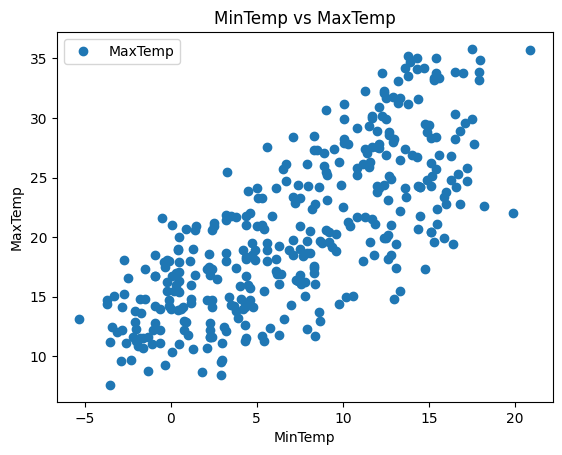

In [5]:
weather_df.plot(x='MinTemp', y='MaxTemp', style='o')

import matplotlib.pyplot as plt

plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

There is a sort of linear relationship between the two.

## 3. Histograms

Let’s check the  max temperature. A great way to get started exploring a single variable is with the histogram. A histogram divides the variable into bins, counts the data points in each bin, and shows the bins on the x-axis and the counts on the y-axis. For the plot calls, we specify the binwidth divided by the number of bins. For this plot, we will use bins of length 1 (35/1).

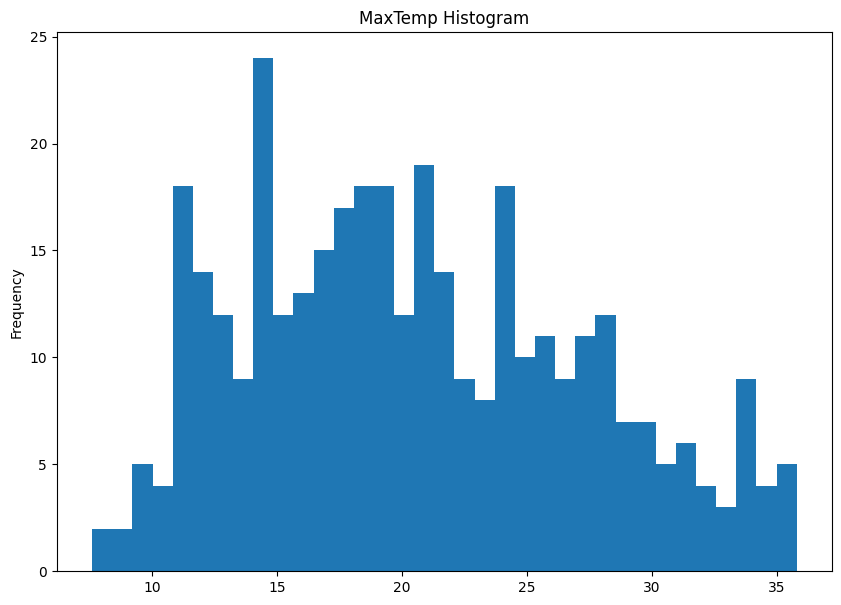

In [8]:
weather_df['MaxTemp'].plot(kind='hist', title='MaxTemp Histogram', bins=int(35/1), figsize=(10, 7));

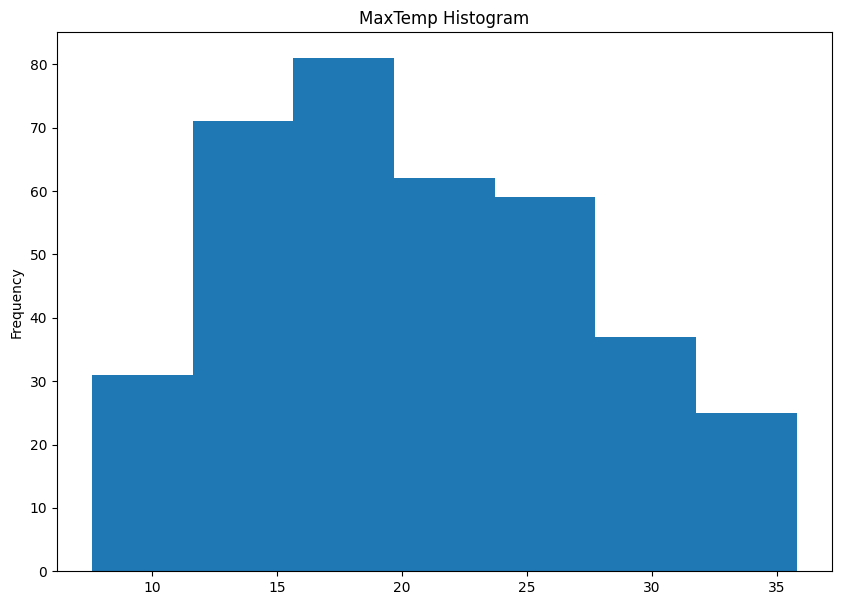

In [9]:
# see the difference when we devide by 5
weather_df['MaxTemp'].plot(kind='hist', title='MaxTemp Histogram', bins=int(35/5), figsize=(10, 7));

## 4. Data splicing

Our next step is to divide the data into independent variables and dependent variables, whose values are to be predicted. In our dataset, we only need two columns. We want to predict the *MaxTemp* (y) depending upon the *MinTemp* (X) recorded.

Next, we split 80% of the data to the training set, while 20% of the data to test set.

In [10]:
# Data splicing

X = weather_df['MinTemp'].values.reshape(-1,1)
y = weather_df['MaxTemp'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
print(X_train) # MinTemp's for training

[[15.9]
 [ 1.2]
 [ 0.1]
 [ 9. ]
 [-1.6]
 [ 3.2]
 [16.4]
 [15.5]
 [12.6]
 [12.6]
 [ 7.1]
 [ 0.3]
 [ 5.8]
 [ 1.2]
 [-2.3]
 [ 3.1]
 [ 3.7]
 [12.8]
 [ 4.9]
 [ 5.4]
 [-2.7]
 [11.3]
 [11.5]
 [14.3]
 [12.3]
 [10.1]
 [11.3]
 [ 8.1]
 [ 2.3]
 [ 2.5]
 [11.7]
 [ 7.8]
 [13.1]
 [13.1]
 [ 4.2]
 [ 4.4]
 [14.5]
 [ 3.4]
 [ 7.9]
 [-0.3]
 [-2. ]
 [ 4.3]
 [-3.3]
 [ 4.2]
 [ 8.7]
 [15.9]
 [14. ]
 [ 5.3]
 [ 8.8]
 [-1. ]
 [-0.1]
 [ 0.4]
 [12.9]
 [-3.5]
 [13.2]
 [-2.8]
 [ 0.5]
 [13.3]
 [ 8.2]
 [14.5]
 [12.3]
 [13.6]
 [15.4]
 [ 9.8]
 [ 6.3]
 [ 7.1]
 [ 0.9]
 [ 0.4]
 [ 5.3]
 [12.1]
 [10.8]
 [ 6.1]
 [-1.8]
 [17. ]
 [11.7]
 [11.9]
 [ 6.3]
 [-2.9]
 [13.6]
 [ 2.4]
 [-0.6]
 [-0.9]
 [ 3.9]
 [12.9]
 [ 4. ]
 [ 5. ]
 [ 3.2]
 [ 8.1]
 [12.5]
 [ 0.1]
 [ 2.3]
 [-3.1]
 [ 1.8]
 [16.3]
 [ 0.4]
 [10.6]
 [ 0.4]
 [ 0.8]
 [10.1]
 [ 3.2]
 [12.1]
 [14.9]
 [12. ]
 [ 5.4]
 [ 2.9]
 [ 7.3]
 [12.4]
 [-0.9]
 [15.3]
 [ 1.1]
 [17.5]
 [ 6.4]
 [ 3.2]
 [ 6.7]
 [-0.4]
 [ 5.6]
 [ 7.9]
 [ 7.2]
 [ 9.9]
 [-0.2]
 [12.5]
 [11.7]
 [ 6.5]
 [ 4.3]
 [ 0.5]


In [14]:
print(y_train) # MaxTemp's for training

[23.4 16.  16.7 25.5 11.5 18.7 19.4 22.4 20.2 23.1 28.4 16.  12.4 14.8
  9.7 12.5 14.2 18.5 18.1 15.5 18.1 32.3 25.9 34.1 33.8 27.9 27.4 20.5
 11.6 21.2 30.  15.1 17.4 19.4 14.  16.7 24.2 15.  12.3  9.3 11.3 11.3
 15.1 18.9 13.  19.9 26.9 23.3 19.5 12.2 14.2 18.9 31.8  7.6 33.1 12.2
 11.  26.5 22.4 21.8 30.2 27.4 25.7 14.4 16.1 23.4 20.7 19.  21.  24.1
 21.7 17.2 14.8 33.8 30.2 21.1 19.3  9.6 24.1 11.6 14.  14.2 13.2 28.
 15.9 20.9 21.4 18.7 29.9 21.  12.8 12.   8.7 26.8 15.5 15.1 13.9 13.
 29.9 18.  27.8 28.8 28.9 20.7  9.5 16.4 32.3 12.8 19.6 18.  35.8 16.9
 12.1 24.7 17.9 19.5 26.1 22.9 24.4 18.1 19.9 27.6 25.7 12.6 17.9 27.1
 18.5 21.8 21.8 31.2 11.8 33.8 25.8 14.4 14.5  8.4 26.2 25.5 16.1 22.8
 31.2 34.2 33.9 21.6 19.  14.3 15.  11.1 20.6 18.  18.5 24.8 30.9 26.1
 11.8 10.9 15.5 11.1 27.6 28.4 20.4 25.1 11.7 17.6 17.1 20.7  9.7 23.9
 33.4 15.5 21.  13.8 23.3 24.7 22.  23.4 27.3 18.2 12.2 28.8 25.2 25.8
 19.6 31.6 21.5 29.5 16.8 17.3 10.7 14.7 27.3 13.7 35.  11.5 31.7 16.8
 24.3 27

Let's plot the train (green dots) and test (red dots) data.

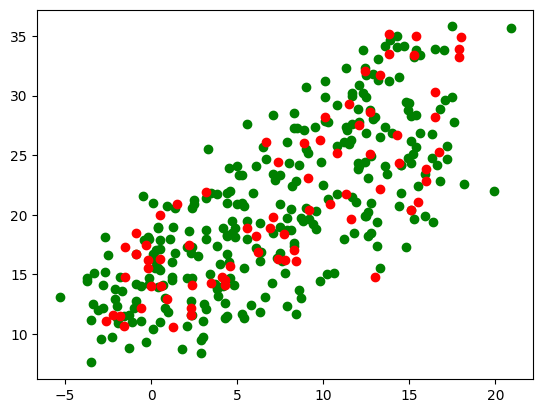

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='green')
plt.scatter(X_test, y_test, color='red')
plt.show()

## 5. Train our model

After splitting the data into training and testing sets, it is now time to train our algorithm. Therefore, we need to import the LinearRegression class, instantiate it, and call the fit() method along with our training data.

As we have already discussed, the linear regression model basically finds the best value for the intercept and slope. This results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

In [16]:
model = LinearRegression()
model.fit(X_train, y_train) # training the model

print('Intercept', model.intercept_) # intercept
print('Coefficient', model.coef_) # slope

Intercept 14.56202411394353
Coefficient [0.81953755]


This means that for each one unit of change in MinTemp, the change in the MaxTemp is about 0.81.

## 6. Predictions

Now that we have trained our model, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the MaxTemp.

In [17]:
y_pred = model.predict(X_test)

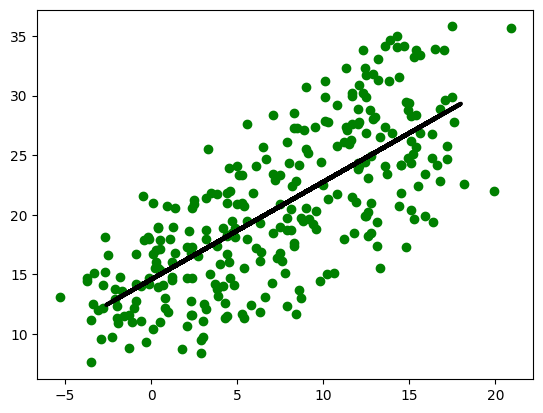

In [18]:
plt.scatter(X_train, y_train, color='green')
plt.plot(X_test, y_pred, color='black', linewidth=3)
plt.show()

In [19]:
# compare the test values of y (actual MaxTemp) with the predicted values of y (predicted MaxTemp)
# the flatten-method will transform a dataframe to a list

compare_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(compare_df)

    Actual  Predicted
0     25.2  23.413030
1     11.5  13.086857
2     21.1  27.264856
3     22.2  25.461874
4     20.4  26.937041
..     ...        ...
69    18.9  20.216833
70    22.8  27.674625
71    16.1  21.446140
72    25.1  24.970151
73    12.2  14.070302

[74 rows x 2 columns]


We can also visualize the comparison result as a bar graph. Note: as the number of records is huge, we are taking only 25 records for representation purpose.

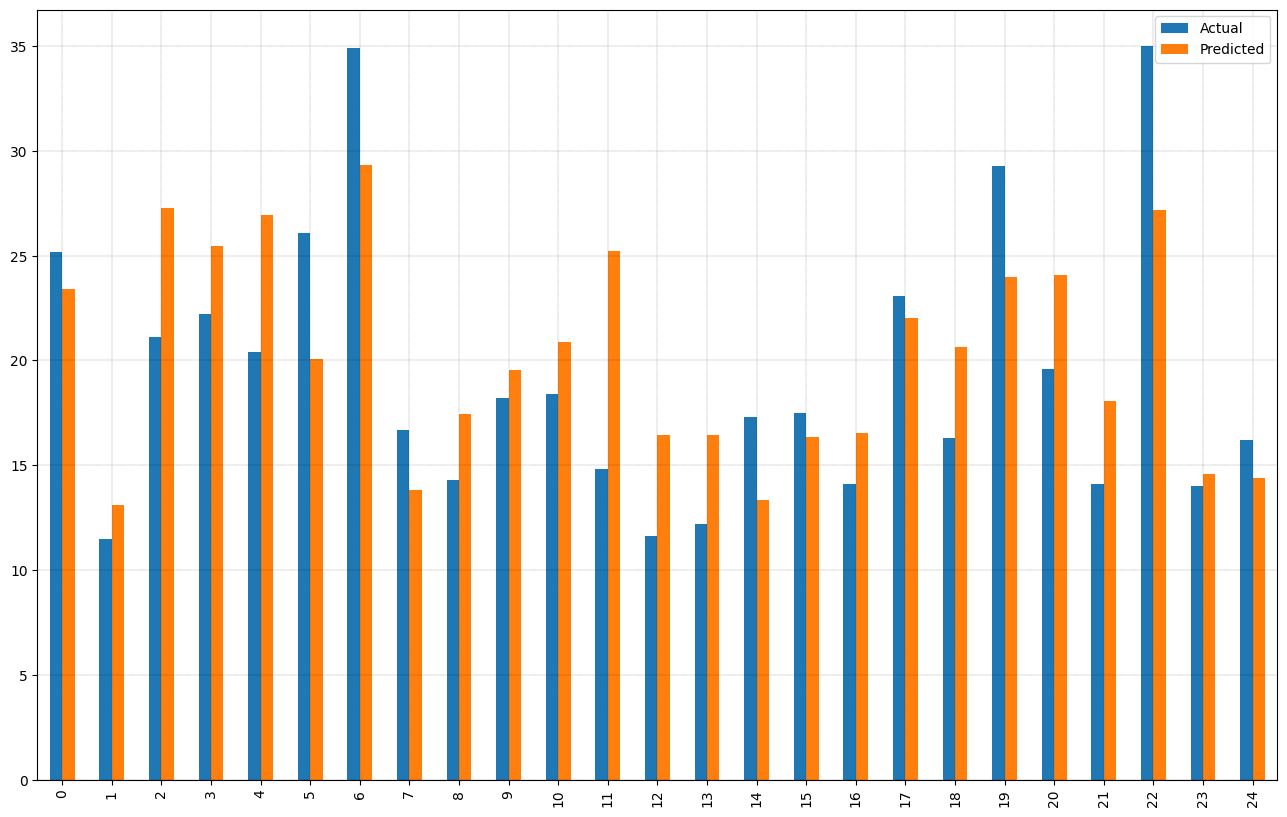

In [20]:
compare25_df = compare_df.head(25)
compare25_df.plot(kind='bar', figsize=(16,10))
plt.grid(linestyle=':', linewidth='0.25', color='black')
plt.show()

Let's plot our straight line with the test data 

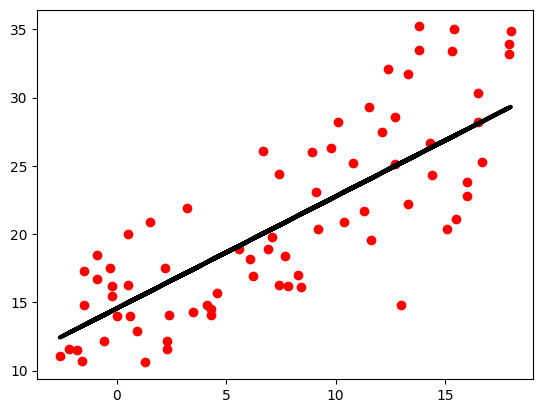

In [21]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='black', linewidth=3)
plt.show()

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used.

In [22]:
from sklearn import metrics

# compute performance metrics
print("Mean absolute error =", round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error =", round(metrics.mean_squared_error(y_test, y_pred), 2))
print("Root Mean Squared Error =", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_pred), 2))

Mean absolute error = 3.51
Mean squared error = 17.01
Root Mean Squared Error = 4.12
R2 score = 0.64
